## Laboratório 5 - Regressão por árvores de decisão, Bagging e Floresta aleatória

## Árvores para regressão

Carregando pacotes.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ISLP import load_data

Carregando a base de dados Hitters.

In [4]:
 !pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 20.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

In [6]:
dados = load_data('Hitters')
dados.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

Removendo linhas com valores ausentes.

In [7]:
dados.dropna(inplace=True)

Visualizando a matriz de correlação.

<ipython-input-8-416a37c1c183>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dados.corr()


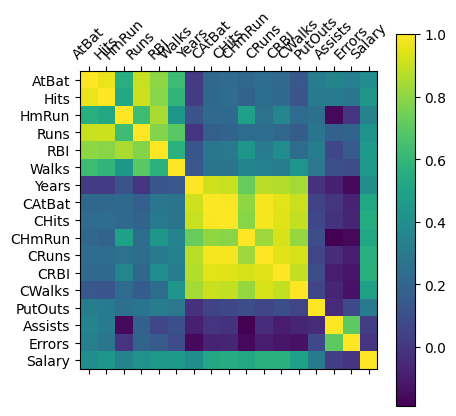

In [8]:
corr_matrix = dados.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

Separando os dados em conjunto de treinamento e teste.

In [9]:
X = dados.drop(columns=['Salary'])
y = dados['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [13]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Árvore de decisão para regressão.

In [14]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Plotando a árvore de decisão.

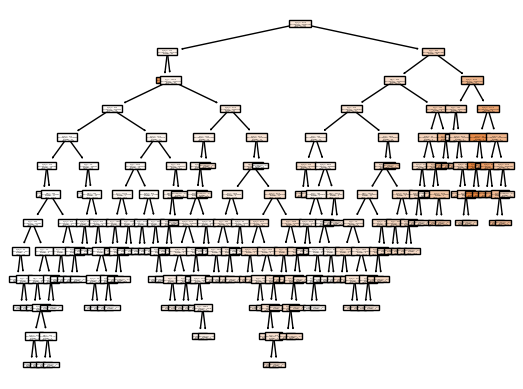

In [22]:
plot_tree(tree_reg, filled=True)
plt.show()

Métricas de desempenho.

In [23]:
y_pred = tree_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Árvore de Decisão:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Árvore de Decisão:
RMSE: 429.18
MAE: 252.06
R2 Score: -0.07


Validando e podando a árvore de decisão.

In [24]:
scores = []
for size in range(2, 11):
  pruned_tree_reg = DecisionTreeRegressor(random_state=1, max_leaf_nodes=size)
  score = np.mean(cross_val_score(pruned_tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
  scores.append(-score)

In [25]:
best_size = np.argmax(scores) + 2  # +2 porque o range começa em 2
pruned_tree_reg = DecisionTreeRegressor(random_state=1, max_leaf_nodes=best_size)
pruned_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

Métricas de desempenho da árvore podada.

In [26]:
y_pred_pruned = pruned_tree_reg.predict(X_test)
rmse_pruned = np.sqrt(mean_squared_error(y_test, y_pred_pruned))
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print("\nÁrvore de Decisão Podada:")
print(f"RMSE: {rmse_pruned:.2f}")
print(f"MAE: {mae_pruned:.2f}")
print(f"R2 Score: {r2_pruned:.2f}")


Árvore de Decisão Podada:
RMSE: 343.47
MAE: 261.11
R2 Score: 0.32


##Bagging

In [28]:
bag_reg = RandomForestRegressor(n_estimators=500, max_features=len(X.columns), random_state=1)
bag_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=19, n_estimators=500, random_state=1)

Métricas de desempenho do Bagging.

In [29]:
y_pred_bag = bag_reg.predict(X_test)
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mae_bag = mean_absolute_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)
print("\nBagging:")
print(f"RMSE: {rmse_bag:.2f}")
print(f"MAE: {mae_bag:.2f}")
print(f"R2 Score: {r2_bag:.2f}")


Bagging:
RMSE: 263.90
MAE: 171.19
R2 Score: 0.60


##Random Forest

In [30]:
rf_reg = RandomForestRegressor(n_estimators=500, max_features=len(X.columns)//3, random_state=1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=500, random_state=1)

Métricas de desempenho da Random Forest.

In [31]:
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")


Random Forest:
RMSE: 258.93
MAE: 166.26
R2 Score: 0.61


###Comparando com Regressão Linear Múltipla

In [33]:
lm_reg = LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression()

Métricas de desempenho da Regressão Linear Múltipla.

In [34]:
y_pred_lm = lm_reg.predict(X_test)
rmse_lm = np.sqrt(mean_squared_error(y_test, y_pred_lm))
mae_lm = mean_absolute_error(y_test, y_pred_lm)
r2_lm = r2_score(y_test, y_pred_lm)
print("\nRegressão Linear Múltipla:")
print(f"RMSE: {rmse_lm:.2f}")
print(f"MAE: {mae_lm:.2f}")
print(f"R2 Score: {r2_lm:.2f}")


Regressão Linear Múltipla:
RMSE: 341.60
MAE: 251.56
R2 Score: 0.32
